# Combine IMERG and IBTrACS

In [9]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
import math

import ocha_stratus as stratus
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from src.datasources import ibtracs
from src.constants import *

In [11]:
df_storms = ibtracs.load_storms()

In [12]:
df_storms

,storm_id,sid,atcf_id,season,number,name,provisional,created_at
0,57acf349-624b-4271-bff3-af0ae24140b6,1842298N11080,None,1842,1,NOT_NAMED,False,2025-05-13 15:18:02.051817
1,83d3d32c-2144-40e1-b974-4dd478eeb3fb,1845336N10074,None,1845,1,NOT_NAMED,False,2025-05-13 15:18:02.051817
2,d5403c12-3f0e-499f-b723-b886d9e92a9c,1848011S09079,None,1848,1,NOT_NAMED,False,2025-05-13 15:18:02.051817
3,8f0323c9-f874-4316-b366-04c642e6c22a,1848011S09080,None,1848,2,NOT_NAMED,False,2025-05-13 15:18:02.051817
4,3c19d3ea-e69b-4410-bd0d-52ff5f872aaf,1848011S15057,None,1848,3,NOT_NAMED,False,2025-05-13 15:18:02.051817
...,...,...,...,...,...,...,...,...
13806,e680a7df-7190-4e43-b2b2-d9e685ae2d63,2024123S09045,SI232024,2024,23,HIDAYA,True,2025-05-13 15:18:02.051817
13807,eb88ed97-3d36-469c-9518-056c9ea48862,2024138S09053,SI242024,2024,24,IALY,True,2025-05-13 15:18:02.051817
13808,8dcec1b6-0226-4afc-8733-ab36566dc98c,2024141S02075,SI252024,2024,25,NOT_NAMED,True,2025-05-13 15:18:02.051817
13809,e94f790b-a018-49ba-a7d9-2588d41f1957,2024146N11126,WP012024,2024,26,EWINIAR,True,2025-05-13 15:18:02.051817


In [13]:
blob_name = f"{PROJECT_PREFIX}/processed/storm_stats/zma_stats.parquet"

In [14]:
df_stats = stratus.load_parquet_from_blob(blob_name)

In [15]:
df_stats = df_stats.merge(df_storms)
df_stats

,sid,valid_time_min,valid_time_max,wind_speed_max,max_roll2_mean,storm_id,atcf_id,season,number,name,provisional,created_at
0,1851228N13313,1851-08-19 12:00:00.000040,1851-08-21 12:00:00.000040,70.0,NaN,e0cd8ee5-8d96-42c6-a248-fb0e2fb4bc07,AL041851,1851,10,NOT_NAMED,False,2025-05-13 15:18:02.051817
1,1852232N21293,1852-08-20 12:00:00.000040,1852-08-22 12:00:00.000040,90.0,NaN,9c11c461-ce3e-4d64-9416-314107d0c37e,AL011852,1852,4,NOT_NAMED,False,2025-05-13 15:18:02.051817
2,1852249N17296,1852-09-06 18:00:00.000040,1852-09-06 18:00:00.000040,40.0,NaN,69860b38-badf-4d3e-83fe-36c02f9c2a53,AL021852,1852,8,NOT_NAMED,False,2025-05-13 15:18:02.051817
3,1852264N13309,1852-09-27 00:00:00.000040,1852-09-28 00:00:00.000040,80.0,NaN,37bdeee4-9e31-4afc-b434-d119904440b5,AL041852,1852,9,NOT_NAMED,False,2025-05-13 15:18:02.051817
4,1852278N14293,1852-10-07 12:00:00.000040,1852-10-08 06:00:00.000040,90.0,NaN,86404d22-8e7c-4412-8a27-bf3720e8188d,AL051852,1852,14,NOT_NAMED,False,2025-05-13 15:18:02.051817
...,...,...,...,...,...,...,...,...,...,...,...,...
462,2022154N21273,2022-06-03 18:00:00.000039,2022-06-04 00:00:00.000039,35.0,85.722103,a4d994f4-5c67-4ff9-ae50-fd5a5a249661,AL012022,2022,14,ALEX,False,2025-05-13 15:18:02.051817
463,2022266N12294,2022-09-26 12:00:00.000039,2022-09-27 18:00:00.000039,110.0,53.925203,81282d13-1a51-4223-9367-1559b2cfd06a,AL092022,2022,35,IAN,False,2025-05-13 15:18:02.051817
464,2023152N26274,2023-06-03 18:00:00.000039,2023-06-04 06:00:00.000039,25.0,53.528820,d83c6c3b-73d0-4660-a7ec-bf9f02be00fb,AL022023,2023,18,ARLENE,True,2025-05-13 15:18:02.051817
465,2023239N21274,2023-08-26 12:00:00.000039,2023-08-29 12:00:00.000039,70.0,33.697277,78935093-6fac-4d34-8f44-db2425ede077,AL102023,2023,46,IDALIA,True,2025-05-13 15:18:02.051817


Text(0, 0.5, 'Total 2-day precipitation, average over whole country (mm)')

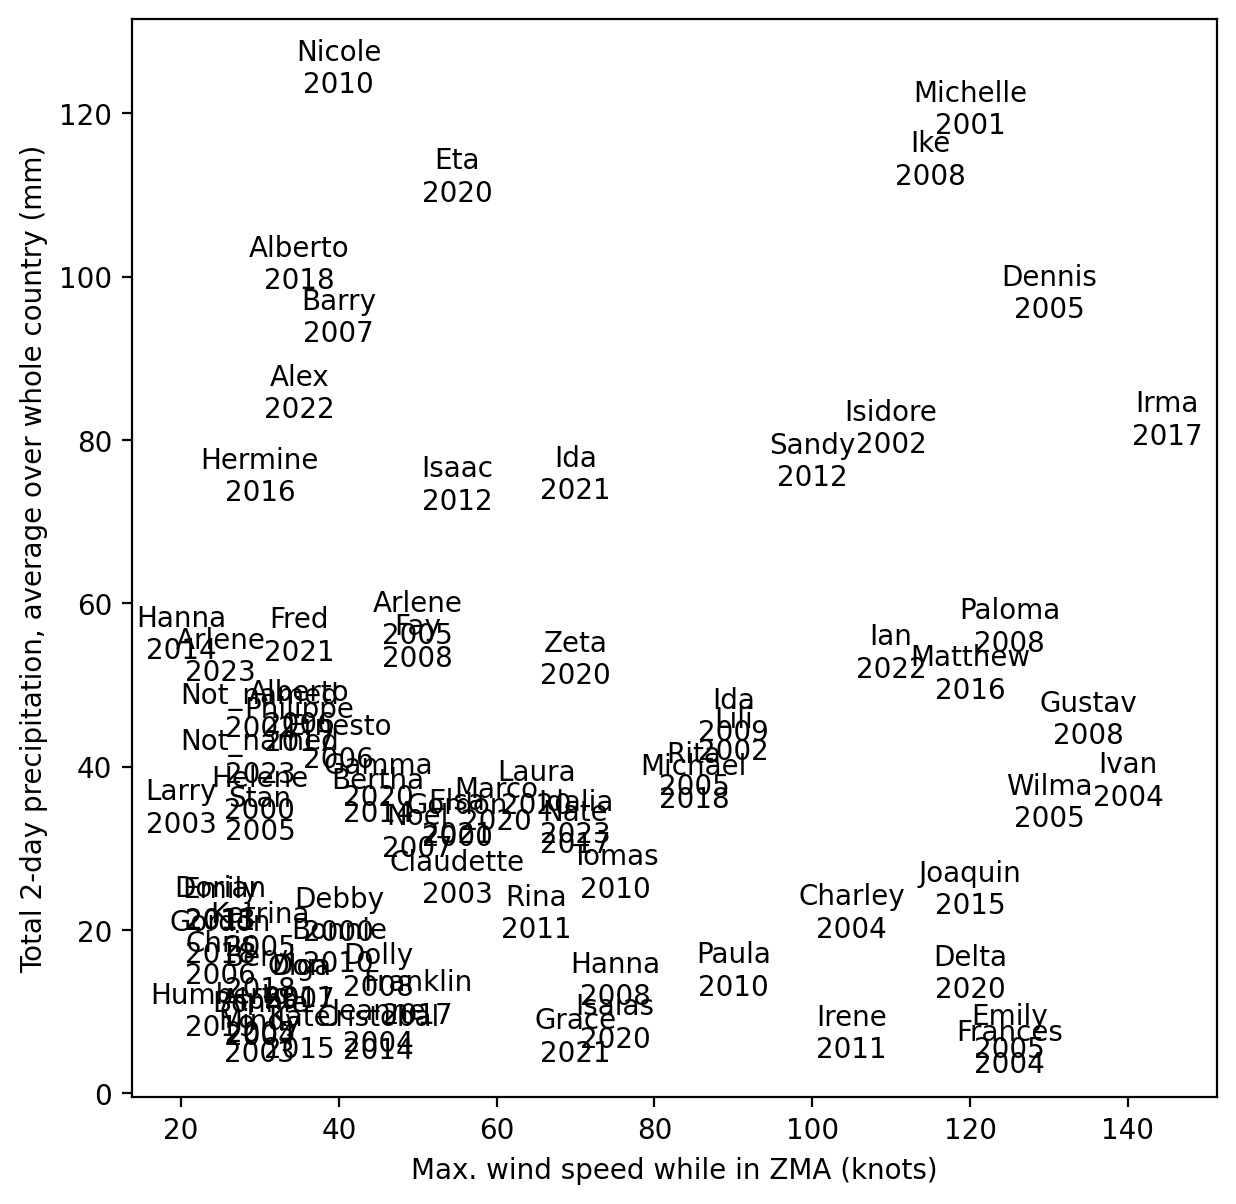

In [16]:
fig, ax = plt.subplots(dpi=200, figsize=(7, 7))

df_stats.plot(
    x="wind_speed_max", y="max_roll2_mean", linewidth=0, ax=ax, legend=False
)

for _, row in df_stats.iterrows():
    ax.annotate(
        row["name"].capitalize() + "\n" + str(row["season"]),
        (row["wind_speed_max"], row["max_roll2_mean"]),
        ha="center",
        va="center",
    )

ax.set_xlabel("Max. wind speed while in ZMA (knots)")
ax.set_ylabel("Total 2-day precipitation, average over whole country (mm)")

In [17]:
target_rp = 4

In [18]:
df_stats

,sid,valid_time_min,valid_time_max,wind_speed_max,max_roll2_mean,storm_id,atcf_id,season,number,name,provisional,created_at
0,1851228N13313,1851-08-19 12:00:00.000040,1851-08-21 12:00:00.000040,70.0,NaN,e0cd8ee5-8d96-42c6-a248-fb0e2fb4bc07,AL041851,1851,10,NOT_NAMED,False,2025-05-13 15:18:02.051817
1,1852232N21293,1852-08-20 12:00:00.000040,1852-08-22 12:00:00.000040,90.0,NaN,9c11c461-ce3e-4d64-9416-314107d0c37e,AL011852,1852,4,NOT_NAMED,False,2025-05-13 15:18:02.051817
2,1852249N17296,1852-09-06 18:00:00.000040,1852-09-06 18:00:00.000040,40.0,NaN,69860b38-badf-4d3e-83fe-36c02f9c2a53,AL021852,1852,8,NOT_NAMED,False,2025-05-13 15:18:02.051817
3,1852264N13309,1852-09-27 00:00:00.000040,1852-09-28 00:00:00.000040,80.0,NaN,37bdeee4-9e31-4afc-b434-d119904440b5,AL041852,1852,9,NOT_NAMED,False,2025-05-13 15:18:02.051817
4,1852278N14293,1852-10-07 12:00:00.000040,1852-10-08 06:00:00.000040,90.0,NaN,86404d22-8e7c-4412-8a27-bf3720e8188d,AL051852,1852,14,NOT_NAMED,False,2025-05-13 15:18:02.051817
...,...,...,...,...,...,...,...,...,...,...,...,...
462,2022154N21273,2022-06-03 18:00:00.000039,2022-06-04 00:00:00.000039,35.0,85.722103,a4d994f4-5c67-4ff9-ae50-fd5a5a249661,AL012022,2022,14,ALEX,False,2025-05-13 15:18:02.051817
463,2022266N12294,2022-09-26 12:00:00.000039,2022-09-27 18:00:00.000039,110.0,53.925203,81282d13-1a51-4223-9367-1559b2cfd06a,AL092022,2022,35,IAN,False,2025-05-13 15:18:02.051817
464,2023152N26274,2023-06-03 18:00:00.000039,2023-06-04 06:00:00.000039,25.0,53.528820,d83c6c3b-73d0-4660-a7ec-bf9f02be00fb,AL022023,2023,18,ARLENE,True,2025-05-13 15:18:02.051817
465,2023239N21274,2023-08-26 12:00:00.000039,2023-08-29 12:00:00.000039,70.0,33.697277,78935093-6fac-4d34-8f44-db2425ede077,AL102023,2023,46,IDALIA,True,2025-05-13 15:18:02.051817


In [28]:
df_stats_complete = df_stats.dropna()

In [34]:
total_years = df_stats_complete["season"].nunique()

In [42]:
target_year_count = math.floor((total_years + 1) / target_rp)

In [43]:
target_year_count

6

In [96]:
dicts = []

# check for each Cat limit
for cat_limit in CAT_LIMITS + [(0, None)]:
    dff = df_stats_complete[
        df_stats_complete["wind_speed_max"] >= cat_limit[0]
    ].copy()
    dff = dff.sort_values("max_roll2_mean", ascending=False)

    for rain_thresh in dff["max_roll2_mean"]:
        dfff = dff[dff["max_roll2_mean"] >= rain_thresh]
        trigger_year_count = dfff["season"].nunique()
        if trigger_year_count > target_year_count:
            break
        dict_out = {
            "max_roll2_mean": rain_thresh,
            "cat": cat_limit[1],
            "wind_speed_max": cat_limit[0],
            "trigger_year_count": trigger_year_count,
            "overall_rp": (total_years + 1) / dfff["season"].nunique(),
        }
    if dict_out["trigger_year_count"] == target_year_count:
        dicts.append(dict_out)

# check for windspeed-only
dff = df_stats_complete.sort_values("wind_speed_max", ascending=False).copy()
for wind_thresh in dff["wind_speed_max"]:
    dfff = dff[dff["wind_speed_max"] >= wind_thresh]
    trigger_year_count = dfff["season"].nunique()
    if trigger_year_count > target_year_count:
        break
    dict_out = {
        "max_roll2_mean": None,
        "cat": None,
        "wind_speed_max": wind_thresh,
        "trigger_year_count": trigger_year_count,
        "overall_rp": (total_years + 1) / dfff["season"].nunique(),
    }
dicts.append(dict_out)

df_threshs = pd.DataFrame(dicts)

In [97]:
df_threshs

,max_roll2_mean,cat,wind_speed_max,trigger_year_count,overall_rp
0,97.973385,Trop. Storm,34.0,6,4.166667
1,77.383704,Cat. 1,64.0,6,4.166667
2,57.134947,Cat. 2,83.0,6,4.166667
3,57.134947,Cat. 3,96.0,6,4.166667
4,35.630949,Cat. 4,113.0,6,4.166667
5,97.973385,None,0.0,6,4.166667
6,NaN,None,125.0,4,6.250000


In [105]:
CAT_LIMITS

[(34, 'Trop. Storm'),
 (64, 'Cat. 1'),
 (83, 'Cat. 2'),
 (96, 'Cat. 3'),
 (113, 'Cat. 4'),
 (137, 'Cat. 5')]

In [141]:
cat_colors = {
    "Trop. Storm": "dodgerblue",
    "Cat. 1": "gold",
    "Cat. 2": "darkorange",
    "Cat. 3": "orangered",
    "Cat. 4": "darkred",
    "Cat. 5": "purple",
}

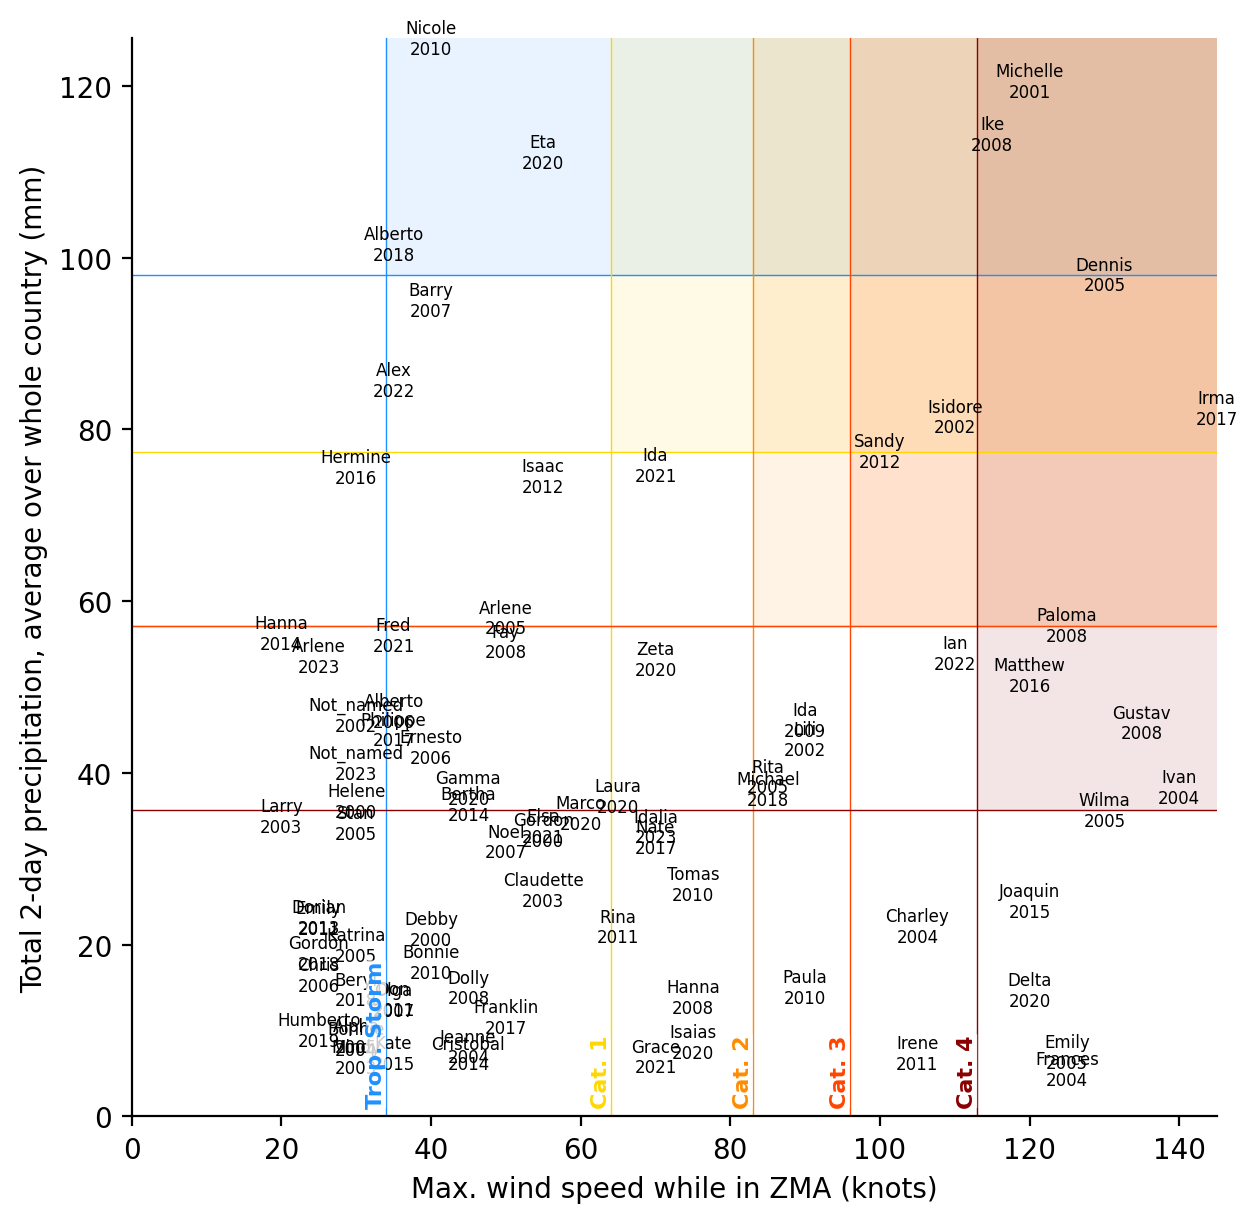

In [155]:
fig, ax = plt.subplots(dpi=200, figsize=(7, 7))

ymax = df_stats_complete["max_roll2_mean"].max()
xmax = df_stats_complete["wind_speed_max"].max()

for _, row in df_stats_complete.iterrows():
    ax.annotate(
        row["name"].capitalize() + "\n" + str(row["season"]),
        (row["wind_speed_max"], row["max_roll2_mean"]),
        ha="center",
        va="center",
        fontsize=6,
    )

for cat_name, row in df_threshs.set_index("cat").iterrows():
    if cat_name is None:
        continue
    color = cat_colors[cat_name]
    ax.axhline(row["max_roll2_mean"], color=color, linewidth=0.5)
    ax.axvline(row["wind_speed_max"], color=color, linewidth=0.5)
    ax.add_patch(
        patches.Rectangle(
            (row["wind_speed_max"], row["max_roll2_mean"]),  # bottom left
            xmax - row["wind_speed_max"],  # width
            ymax - row["max_roll2_mean"],  # height
            facecolor=color,
            alpha=0.1,
            zorder=0,
        )
    )
    ax.annotate(
        cat_name,
        (row["wind_speed_max"], 1),
        va="bottom",
        ha="right",
        color=color,
        rotation=90,
        fontweight="bold",
        fontsize=8,
        bbox=dict(
            boxstyle="round,pad=0",
            facecolor="white",  # Highlight color
            edgecolor="none",  # No border
            alpha=0.8,  # Transparency
        ),
    )


ax.set_xlim(left=0, right=xmax)
ax.set_ylim(bottom=0, top=ymax)

ax.set_xlabel("Max. wind speed while in ZMA (knots)")
ax.set_ylabel("Total 2-day precipitation, average over whole country (mm)")

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)